# Overview of results
Let's take this notebook to look at the results of the various models and architectures, and compare with our initial findings. We can create figures for loss graphs and analyze the confusion matrices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in loss CSVs
loss = pd.read_csv('loss.csv')
lossweighted = pd.read_csv('lossweighted.csv')
lossSEQ = pd.read_csv('lossSEQ.csv')
lossSEQweighted = pd.read_csv('lossSEQweighted.csv')
lossScherzer = pd.read_csv('lossSCHERZER.csv')
lossSCHERZERweighted = pd.read_csv('lossSCHERZERweighted.csv')

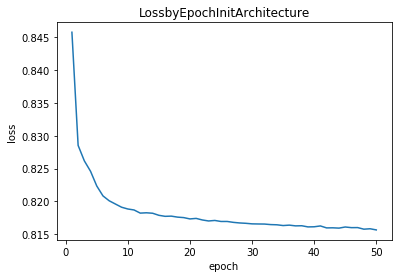

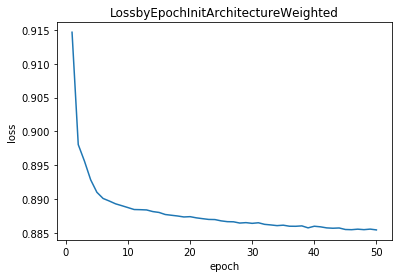

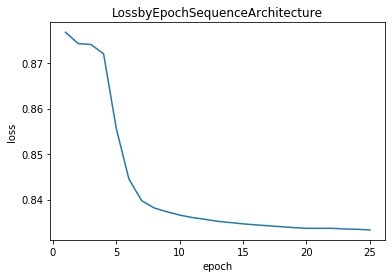

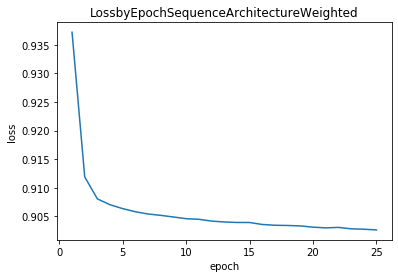

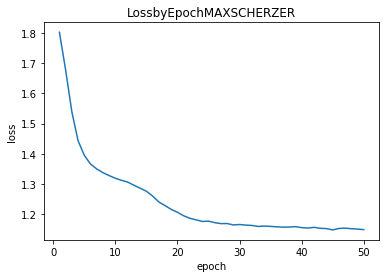

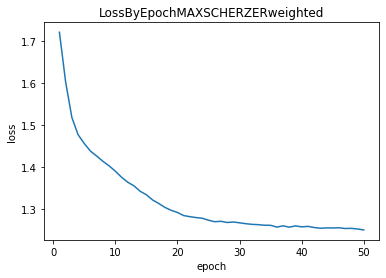

In [3]:
# plot loss x epoch to show learning progress

def loss_plot(loss_csv, title):
    loss_df = pd.read_csv(loss_csv)
    lossfig = plt.figure()
    sns.lineplot(x='epoch', y='loss', data=loss_df)
    plt.title(title)
    lossfig.savefig('results_figures/' + title + '.png')
    
loss_plot('loss.csv', 'LossbyEpochInitArchitecture')
loss_plot('lossweighted.csv', 'LossbyEpochInitArchitectureWeighted')
loss_plot('lossSEQ.csv', 'LossbyEpochSequenceArchitecture')
loss_plot('lossSEQweighted.csv', 'LossbyEpochSequenceArchitectureWeighted')
loss_plot('lossSCHERZER.csv', 'LossbyEpochMAXSCHERZER')
loss_plot('lossSCHERZERweighted.csv', 'LossByEpochMAXSCHERZERweighted')

In [4]:
print(pd.read_csv('confusionSCHERZER.csv'))

   FF (actual)  SL (actual)  CH (actual)  CU (actual)  FC (actual)  \
0         2079          680          581          349          214   
1           74           63            3            4            4   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   
6         2153          743          584          353          218   

   FT (actual)  totals  
0           18    3921  
1            4     152  
2            0       0  
3            0       0  
4            0       0  
5            0       0  
6           22    4073  


In [7]:
# look at confusion matrices

def confusion(confusion_csv, title):
    confusion_df = pd.read_csv(confusion_csv)
    confusion_df.index = ['Fastball (predicted)', 'Change Up (predicted)', 'Breaking Ball (predicted)', 'totals']
    confusion_df.to_html('results_figures/' + title + '.html')
    return confusion_df

def confusion_scherzer(confusion_csv, title):
    confusion_df = pd.read_csv(confusion_csv)
    confusion_df.index = ['FF (predicted)', 'SL (predicted)', 'CH (predicted)', 
                          'CU (predicted)', 'FC (predicted)', 'FT (predicted)', 'totals']
    confusion_df.to_html('results_figures/' + title + '.html')
    return confusion_df

initconf = confusion('confusion.csv', 'init_architecture_confusion')
initconfweighted = confusion('confusionweighted.csv', 'init_architecture_confusion_weighted')
seqconf = confusion('confusionSEQ.csv', 'seq_architecture_confusion')
seqconfweighted = confusion('confusionSEQweighted.csv', 'seq_archictecture_weighted_confusion')
scherzerconf = confusion_scherzer('confusionSCHERZER.csv', 'MAXSCHERZER_confusion')
scherzerconfweighted = confusion_scherzer('confusionSCHERZERweighted.csv', 'MAXSCHERZERweighted_confusion')

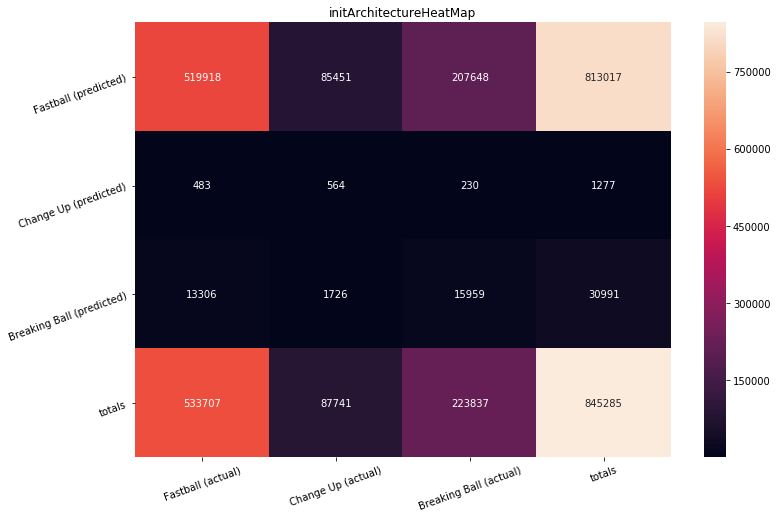

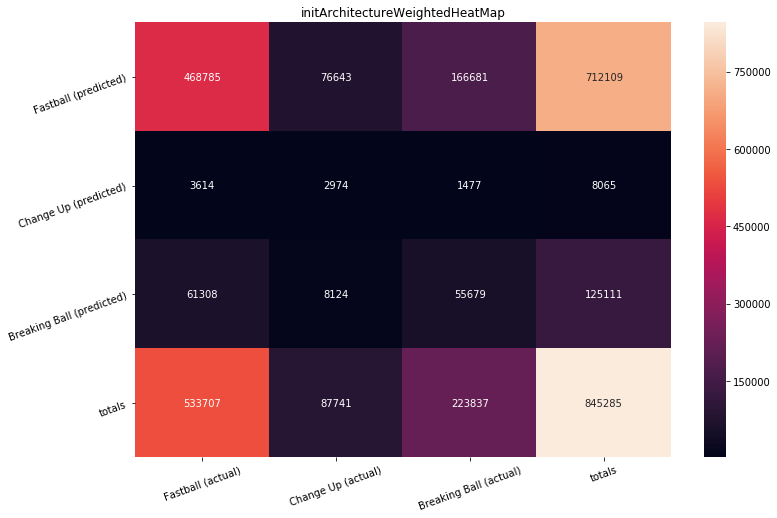

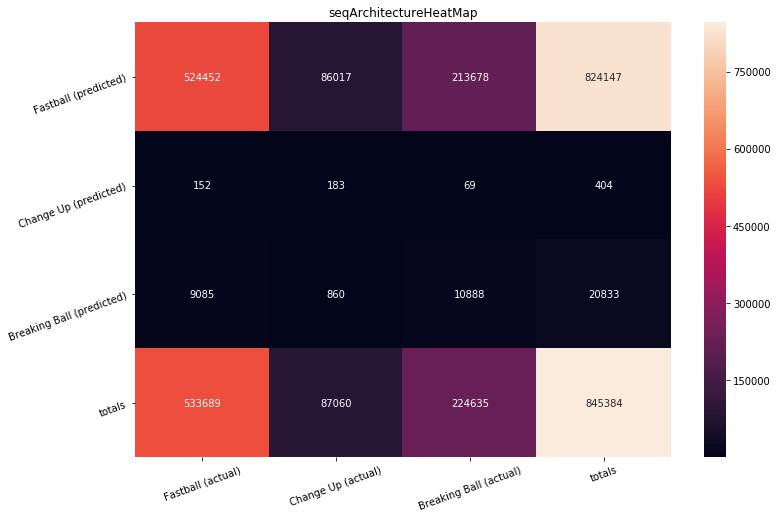

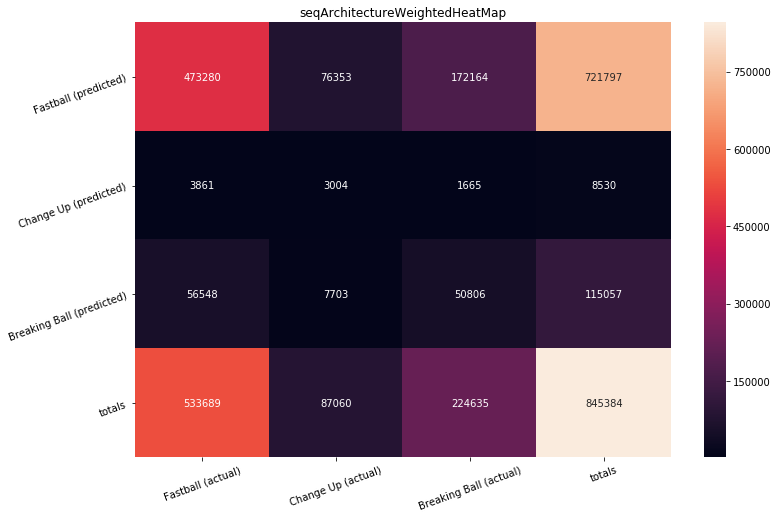

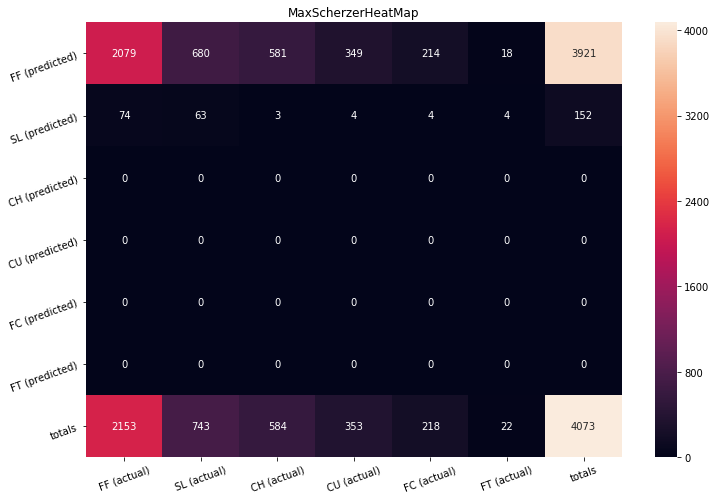

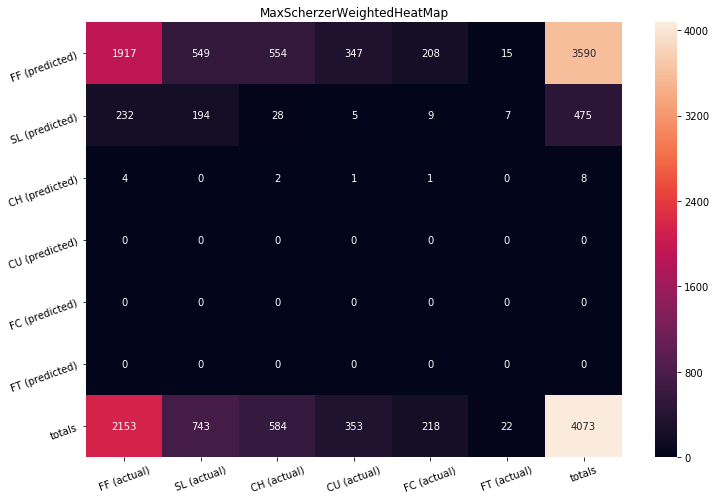

In [8]:
def confusion_heatmap(confusion, title):
    plt.figure(figsize=(12,8))
    sns.heatmap(confusion, annot=True, fmt='d')
    plt.title(title)
    plt.xticks(rotation=20)
    plt.yticks(rotation=20)
    plt.savefig('results_figures/' + title + '.png')

confusion_heatmap(initconf, 'initArchitectureHeatMap')
confusion_heatmap(initconfweighted, 'initArchitectureWeightedHeatMap')
confusion_heatmap(seqconf, 'seqArchitectureHeatMap')
confusion_heatmap(seqconfweighted, 'seqArchitectureWeightedHeatMap')
confusion_heatmap(scherzerconf, 'MaxScherzerHeatMap')
confusion_heatmap(scherzerconfweighted, 'MaxScherzerWeightedHeatMap')

In [11]:
# calculate precision, recall, f1
def precision_recall_f1(confusion, title):
    frecall = confusion.loc['Fastball (predicted)']['Fastball (actual)'] / confusion.loc['totals']['Fastball (actual)']
    fprecision = confusion.loc['Fastball (predicted)']['Fastball (actual)'] / confusion.loc['Fastball (predicted)']['totals']
    crecall = confusion.loc['Change Up (predicted)']['Change Up (actual)'] / confusion.loc['totals']['Change Up (actual)']
    cprecision = confusion.loc['Change Up (predicted)']['Change Up (actual)'] / confusion.loc['Change Up (predicted)']['totals']
    brecall = confusion.loc['Breaking Ball (predicted)']['Breaking Ball (actual)'] / confusion.loc['totals']['Breaking Ball (actual)']
    bprecision = confusion.loc['Breaking Ball (predicted)']['Breaking Ball (actual)'] / confusion.loc['Breaking Ball (predicted)']['totals']

    f1 = lambda p, r: 2 * (p * r) / (p + r)
    ff1 = f1(fprecision, frecall)
    cf1 = f1(cprecision, crecall)
    bf1 = f1(bprecision, brecall)

    score_dict = {'precision': [fprecision, cprecision, bprecision],
                  'recall': [frecall, crecall, brecall],
                  'f1': [ff1, cf1, bf1]}
    
    score_df = pd.DataFrame.from_dict(score_dict)
    score_df.index = ['Fastball', 'Change Up', 'Breaking Ball']
    score_df.to_html('results_figures/' + title + '.html')
    
def precision_recall_f1_scherzer(confusion, title):
    ffrecall = confusion.loc['FF (predicted)']['FF (actual)'] / confusion.loc['totals']['FF (actual)']
    ffprecision = confusion.loc['FF (predicted)']['FF (actual)'] / confusion.loc['FF (predicted)']['totals']
    slrecall = confusion.loc['SL (predicted)']['SL (actual)'] / confusion.loc['totals']['SL (actual)']
    slprecision = confusion.loc['SL (predicted)']['SL (actual)'] / confusion.loc['SL (predicted)']['totals']
    chrecall = confusion.loc['CH (predicted)']['CH (actual)'] / confusion.loc['totals']['CH (actual)']
    chprecision = confusion.loc['CH (predicted)']['CH (actual)'] / confusion.loc['CH (predicted)']['totals']
    curecall = confusion.loc['CU (predicted)']['CU (actual)'] / confusion.loc['totals']['CU (actual)']
    cuprecision = confusion.loc['CU (predicted)']['CU (actual)'] / confusion.loc['CU (predicted)']['totals']
    fcrecall = confusion.loc['FC (predicted)']['FC (actual)'] / confusion.loc['totals']['FC (actual)']
    fcprecision = confusion.loc['FC (predicted)']['FC (actual)'] / confusion.loc['FC (predicted)']['totals']
    ftrecall = confusion.loc['FT (predicted)']['FT (actual)'] / confusion.loc['totals']['FT (actual)']
    ftprecision = confusion.loc['FT (predicted)']['FT (actual)'] / confusion.loc['FT (predicted)']['totals']
    
    f1 = lambda p, r: 2 * (p * r) / (p + r)
    fff1 = f1(ffprecision, ffrecall)
    slf1 = f1(slprecision, slrecall)
    chf1 = f1(chprecision, chrecall)
    cuf1 = f1(cuprecision, curecall)
    fcf1 = f1(fcprecision, fcrecall)
    ftf1 = f1(ftprecision, ftrecall)

    score_dict = {'precision': [ffprecision, slprecision, chprecision, cuprecision, fcprecision, ftprecision],
                  'recall': [ffrecall, slrecall, chrecall, curecall, fcrecall, ftrecall],
                  'f1': [fff1, slf1, chf1, cuf1, fcf1, ftf1]}
    
    score_df = pd.DataFrame.from_dict(score_dict)
    score_df.index = ['FF', 'SL', 'CH', 'CU', 'FC', 'FT']
    score_df.to_html('results_figures/' + title + '.html')
    
precision_recall_f1(initconf, 'initArchitectureScore')
precision_recall_f1(initconfweighted, 'initArchitectureWeightdScore')
precision_recall_f1(seqconf, 'seqArchitectureScore')
precision_recall_f1(seqconfweighted, 'seqArchitectureWeightedScore')
precision_recall_f1_scherzer(scherzerconf, 'MAXSCHERZERScore')
precision_recall_f1_scherzer(scherzerconfweighted, 'MAXSCHERZERWeightedScore')


/Users/mclainwilkinson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars
/Users/mclainwilkinson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars
/Users/mclainwilkinson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Users/mclainwilkinson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars
